In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
import os

In [2]:
from scipy import stats


path = "./ao"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_ao = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_ao = pd.concat([all_ao, current_data])
    
all_ao.to_csv(".csv")
    

In [10]:
df = pd.read_csv("datasets/transaction.csv")


In [11]:
df

,date,description,debit,credit,balance
0,07/08/2018,SALES,3718100,0,11189450
1,08/11/2018,SALES,6185000,0,11513400
2,31/10/2017,SALES,3783350,0,3783350
3,29/12/2017,SALES,3890500,0,6833350
4,01/02/2018,SALES,278000,0,4503900
...,...,...,...,...,...
2592,03/11/2017,PAYMENT,0,181300,51400
2593,18/12/2017,PAYMENT,0,43000,77200
2594,29/12/2017,PAYMENT,0,25000,52200
2595,15/01/2017,PAYMENT,0,9000,43200


In [5]:
df['Month'] = df['date'].str[3:5]
df['Month'] = df['Month'].astype('int32')
df.head()

,date,description,debit,credit,balance,Month
0,07/08/2018,SALES,3718100,0,11189450,8
1,08/11/2018,SALES,6185000,0,11513400,11
2,31/10/2017,SALES,3783350,0,3783350,10
3,29/12/2017,SALES,3890500,0,6833350,12
4,01/02/2018,SALES,278000,0,4503900,2


In [6]:
stats.binom(df.credit, df.debit)

In [7]:
df['Year'] = df['date'].str[6:10]
df['Year'] = df['Year'].astype('int32')
df

,date,description,debit,credit,balance,Month,Year
0,07/08/2018,SALES,3718100,0,11189450,8,2018
1,08/11/2018,SALES,6185000,0,11513400,11,2018
2,31/10/2017,SALES,3783350,0,3783350,10,2017
3,29/12/2017,SALES,3890500,0,6833350,12,2017
4,01/02/2018,SALES,278000,0,4503900,2,2018
...,...,...,...,...,...,...,...
2592,03/11/2017,PAYMENT,0,181300,51400,11,2017
2593,18/12/2017,PAYMENT,0,43000,77200,12,2017
2594,29/12/2017,PAYMENT,0,25000,52200,12,2017
2595,15/01/2017,PAYMENT,0,9000,43200,1,2017


In [12]:
df['credit_balance'] = df['balance'] - df['credit']
df

,date,description,debit,credit,balance,credit_balance
0,07/08/2018,SALES,3718100,0,11189450,11189450
1,08/11/2018,SALES,6185000,0,11513400,11513400
2,31/10/2017,SALES,3783350,0,3783350,3783350
3,29/12/2017,SALES,3890500,0,6833350,6833350
4,01/02/2018,SALES,278000,0,4503900,4503900
...,...,...,...,...,...,...
2592,03/11/2017,PAYMENT,0,181300,51400,-129900
2593,18/12/2017,PAYMENT,0,43000,77200,34200
2594,29/12/2017,PAYMENT,0,25000,52200,27200
2595,15/01/2017,PAYMENT,0,9000,43200,34200


In [15]:
df ['debit_balance'] = df['balance'] + df['debit']
df

,date,description,debit,credit,balance,credit_balance,debit_balance
0,07/08/2018,SALES,3718100,0,11189450,11189450,14907550
1,08/11/2018,SALES,6185000,0,11513400,11513400,17698400
2,31/10/2017,SALES,3783350,0,3783350,3783350,7566700
3,29/12/2017,SALES,3890500,0,6833350,6833350,10723850
4,01/02/2018,SALES,278000,0,4503900,4503900,4781900
...,...,...,...,...,...,...,...
2592,03/11/2017,PAYMENT,0,181300,51400,-129900,51400
2593,18/12/2017,PAYMENT,0,43000,77200,34200,77200
2594,29/12/2017,PAYMENT,0,25000,52200,27200,52200
2595,15/01/2017,PAYMENT,0,9000,43200,34200,43200


In [8]:
df.dtypes

date           object
description    object
debit           int64
credit          int64
balance         int64
Month           int32
Year            int32
dtype: object

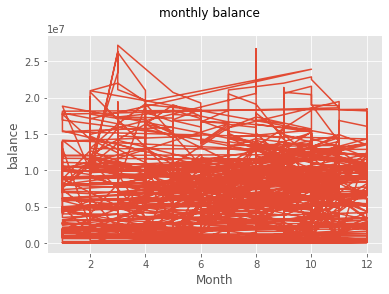

In [20]:
colours = ['red' if i==0 else 'green' for i in df.]

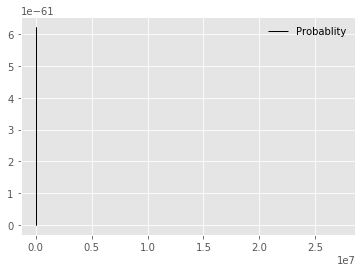

In [10]:
from scipy.stats import binom, poisson, spearmanr, pearsonr

fig, ax = plt.subplots(1,1)
x = df.balance
n, p = 200, 0.5
rv = binom(n,p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='Probablity')
ax.legend(loc='best', frameon=False)

In [14]:
stats.zscore(df.credit)

array([-0.62492793, -0.62492793, -0.62492793, ..., -0.55160385,
       -0.59853126, -0.51347532])

In [ ]:
prob = 1 - stats.norm.cdf(0.21210347)
prob

In [8]:
df['Sales'] = df['debit'].astype('float') / 100*100

In [53]:
df['Payments'] = df['credit'].astype('float') / 100*100

In [54]:
df.dtypes

date            object
description     object
debit            int64
credit           int64
balance          int64
Month            int32
Year             int32
Sales          float64
Payments       float64
dtype: object

In [22]:
df.groupby(['description']).sum()


,debit,credit,balance,Month,Year
description,,,,,
PAYMENT,0,50956198,387825934,2512,738127
PAYMENT,0,1235400,7278232,63,20170
PAYMENT THROUGH ACCESS,0,200000,902100,5,2019
PAYMENT THROUGH FBN,0,60000,13067664,4,2018
PAYMENT THROUGH FCMB,0,260202135,5217044199,6055,1505760
PAYMENT THROUGH GTB,0,78616660,2835803215,1577,506286
PAYMENT THROUGH STANBIC,0,81437204,2110263210,2490,639723
PAYMENT THROUGH UNION BANK,0,80636455,2586300614,1801,633357
SALES,998881200,0,3160323644,4166,1192180


NameError: name 'sns' is not defined

range(1, 13)


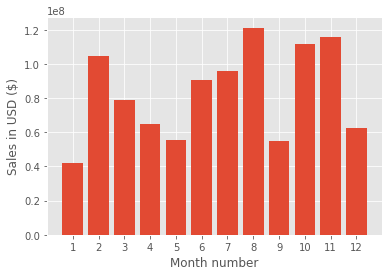

In [11]:
months = range(1,13)
print(months)

plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [126]:
df['Sales'].std()

126006149.7205288

In [91]:
df.dtypes

DATE                 object
REFERENCE NUMBER     object
DESCRIPTION          object
DEBIT               float64
CREDIT              float64
BALANCE               int64
dtype: object

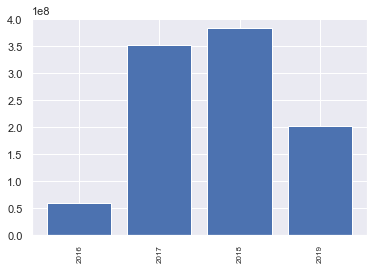

In [93]:
product_group = df.groupby('Year')
quantity_ordered = product_group.sum()['Sales']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [94]:

# pip install seaborn 
import seaborn as sns

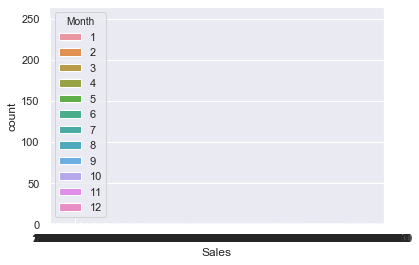

In [95]:
sns.countplot(x='Sales', hue='Month', data=df);

In [142]:
df['new_sales'] = df['DESCRIPTION'].apply(lambda state: state[::] == 'SALES').head()

In [97]:
df['Sales'].describe()

count    2.597000e+03
mean     3.846289e+05
std      1.406056e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.869250e+07
Name: Sales, dtype: float64

In [26]:
df

,date,description,debit,credit,balance,Month,Year,Sales,Payments,% Sales,% Payment
0,07/08/2018,SALES,3718100,0,11189450,8,2018,3718100.0,0.0,37181.0,0.0
1,08/11/2018,SALES,6185000,0,11513400,11,2018,6185000.0,0.0,61850.0,0.0
2,31/10/2017,SALES,3783350,0,3783350,10,2017,3783350.0,0.0,37833.5,0.0
3,29/12/2017,SALES,3890500,0,6833350,12,2017,3890500.0,0.0,38905.0,0.0
4,01/02/2018,SALES,278000,0,4503900,2,2018,278000.0,0.0,2780.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2592,03/11/2017,PAYMENT,0,181300,51400,11,2017,0.0,181300.0,0.0,1813.0
2593,18/12/2017,PAYMENT,0,43000,77200,12,2017,0.0,43000.0,0.0,430.0
2594,29/12/2017,PAYMENT,0,25000,52200,12,2017,0.0,25000.0,0.0,250.0
2595,15/01/2017,PAYMENT,0,9000,43200,1,2017,0.0,9000.0,0.0,90.0


In [12]:
df.corr()

,debit,credit,balance,Month,Sales
debit,1.000000,-0.170983,0.238329,-0.027095,1.000000
credit,-0.170983,1.000000,0.203148,-0.008741,-0.170983
balance,0.238329,0.203148,1.000000,-0.033180,0.238329
Month,-0.027095,-0.008741,-0.033180,1.000000,-0.027095
Sales,1.000000,-0.170983,0.238329,-0.027095,1.000000


In [75]:
y = df2.Sale

In [76]:
y

0       37181.0
1       61850.0
2       37833.5
3       38905.0
4        2780.0
         ...   
2592        0.0
2593        0.0
2594        0.0
2595        0.0
2596        0.0
Name: Sale, Length: 2597, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [81]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
clf.score(X_test,y_test)

1.0

In [83]:
clf.predict(X_test)

array([ 4.42312853e-12,  1.09761089e-11,  4.07000000e+02,  1.14646070e-11,
        2.09000000e+02,  8.01492206e-12,  9.28324084e-12,  1.97708516e-12,
        2.56000000e+03,  1.83320026e-12,  2.67000000e+02,  9.07984798e-12,
        7.98650035e-12,  9.05231445e-12,  7.68274333e-12,  3.04467562e-12,
        6.95177249e-12,  1.60582658e-12,  2.51443311e-12,  2.99650000e+03,
        3.75965925e-12, -9.66338121e-13,  9.50706180e-12,  1.30526701e-11,
        4.50800000e+04,  2.66808797e-12,  5.22604182e-12,  2.88125079e-12,
        1.22213351e-11,  6.34869934e-12,  8.58500000e+02,  1.89750000e+04,
        4.46576109e-12,  8.11617440e-12,  2.41500000e+02,  8.27782287e-12,
        2.28794761e-12,  1.17950094e-12,  1.41042733e-12,  6.01474426e-12,
        8.22986124e-12,  9.35600000e+03,  1.13917764e-11,  2.19950000e+03,
        2.41229259e-12,  9.67759206e-12,  4.28457270e-12,  4.50128823e-12,
        6.61515287e-12,  4.61852778e-12,  1.11085000e+05,  1.14797061e-11,
        9.18110032e-12,  

In [84]:
y_pred = clf.predict(X_test)

In [87]:
df3=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred.flatten()})
df3.head(15)

,Actual,Predicted
1342,0.0,4.423129e-12
2160,0.0,1.097611e-11
152,407.0,4.070000e+02
650,0.0,1.146461e-11
176,209.0,2.090000e+02
1099,0.0,8.014922e-12
1862,0.0,9.283241e-12
2569,0.0,1.977085e-12
339,2560.0,2.560000e+03
1923,0.0,1.833200e-12


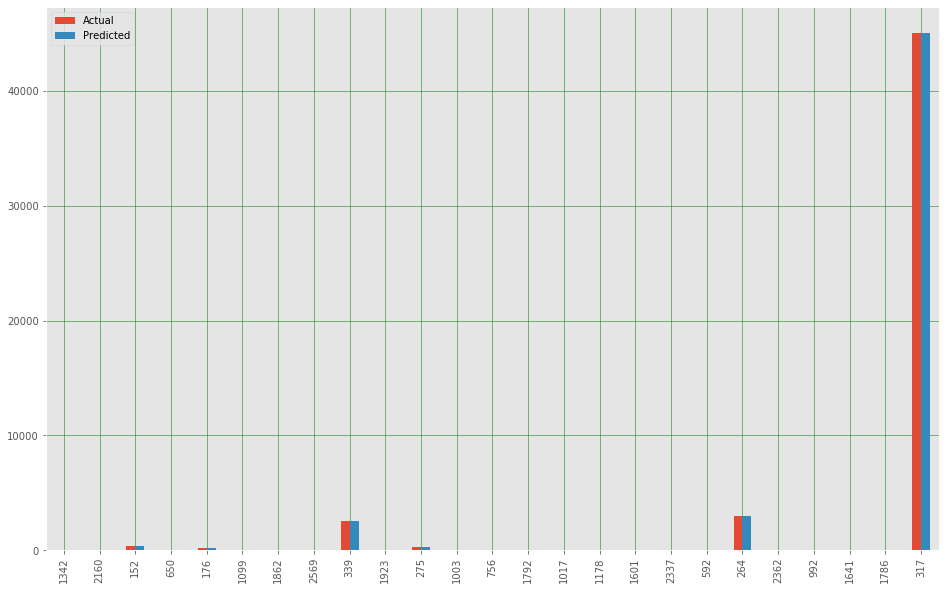

In [88]:
df4 = df3.head(25)
df4.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [89]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=20)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

NameError: name 'ShuffleSplit' is not defined